In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal, scale_color_manual
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_predict

ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1").dropna()



### Part One 

##### KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best parameters: {'n_neighbors': 14}
Best cross-validated ROC AUC: 0.8692
Test ROC AUC: 0.6810
Test ROC AUC: 0.6810

--- Cross-Validated Metrics ---
Confusion Matrix (Cross-Validation):
[[77 24]
 [22 95]]
Cross-Validated ROC AUC: 0.8665
Cross-Validated Precision: 0.7983
Cross-Validated Recall: 0.8120
Cross validated Specificity: 0.7624
Cross validated Cohens Kappa: 0.7624
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       101
           1       0.80      0.81      0.81       117

    accuracy                           0.79       218
   macro avg       0.79      0.79      0.79       218
weighted avg       0.79      0.79      0.79       218

Best parameters: {'n_neighbors': 14}
Best cross-validated ROC AUC: 0.8692
Test ROC AUC: 0.6810
Test ROC AUC: 0.6810

--- Cross-Validated Metrics ---
Confusion Matrix (Cross-Validation):
[[77 24]
 [22 95]]
Cross-Validated ROC AUC: 0.8665
Cross-Validated Pre

<positron-console-cell-12>:83: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


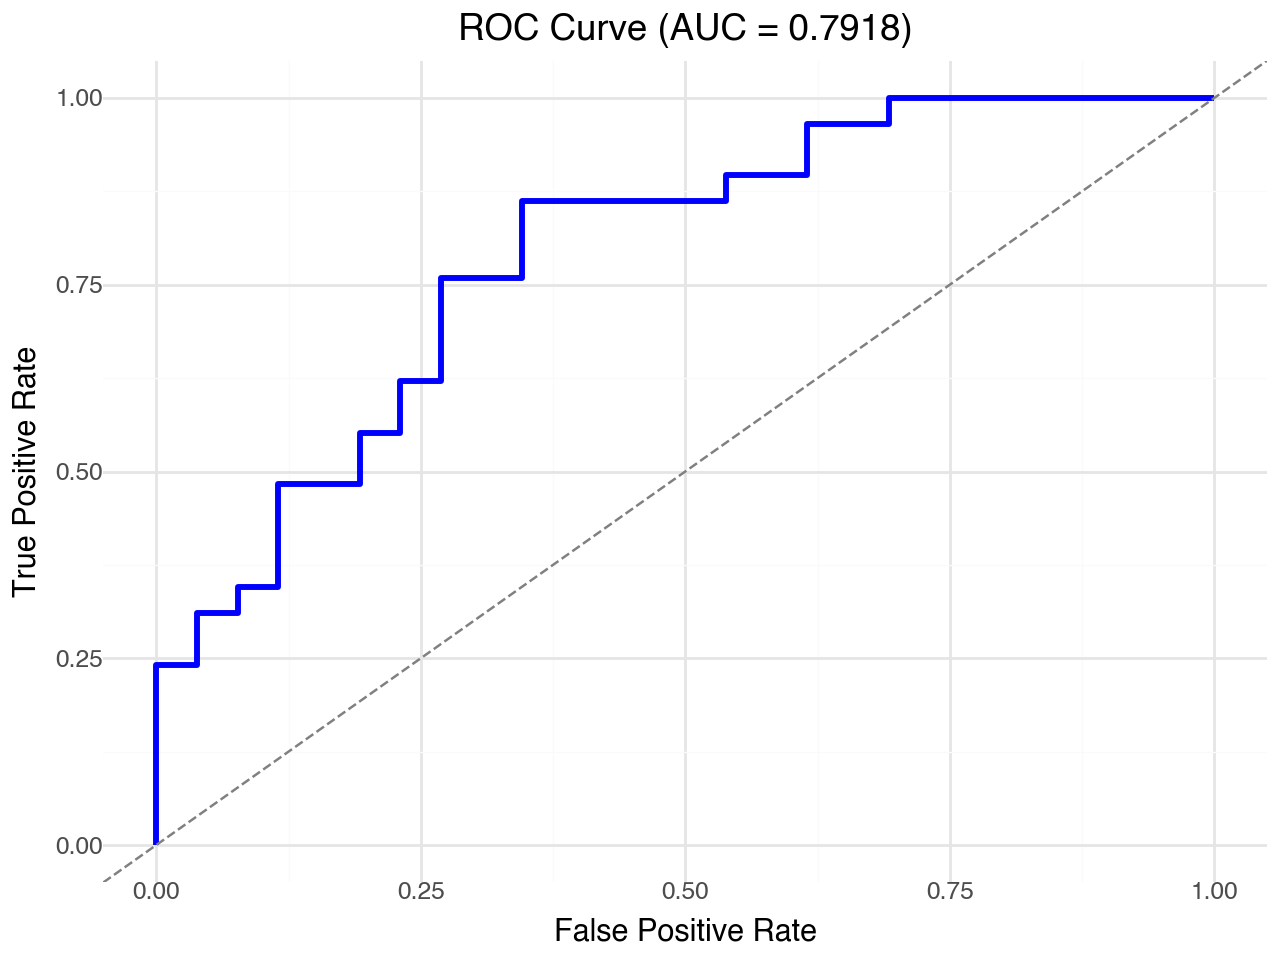

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


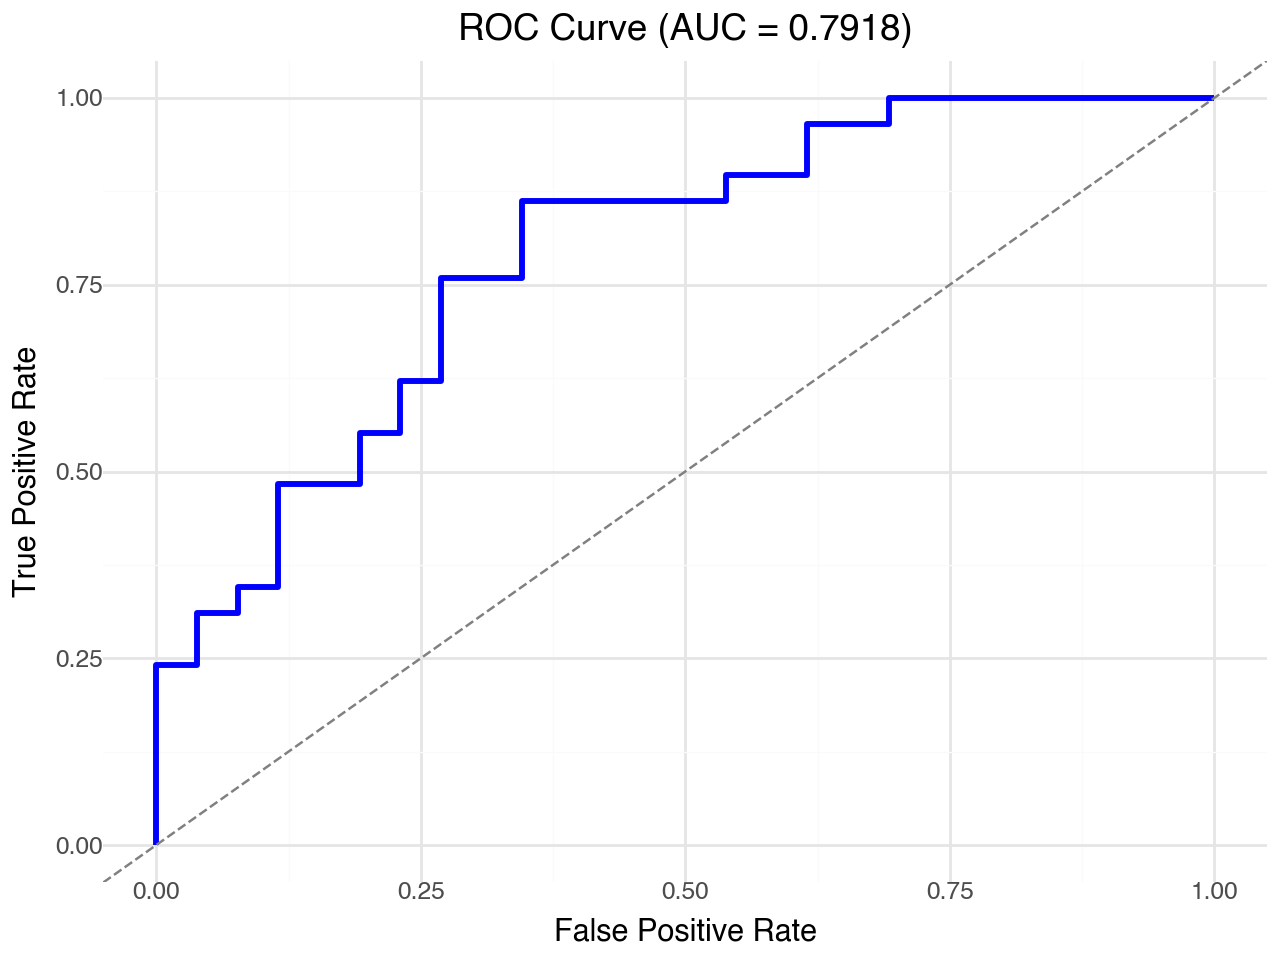

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


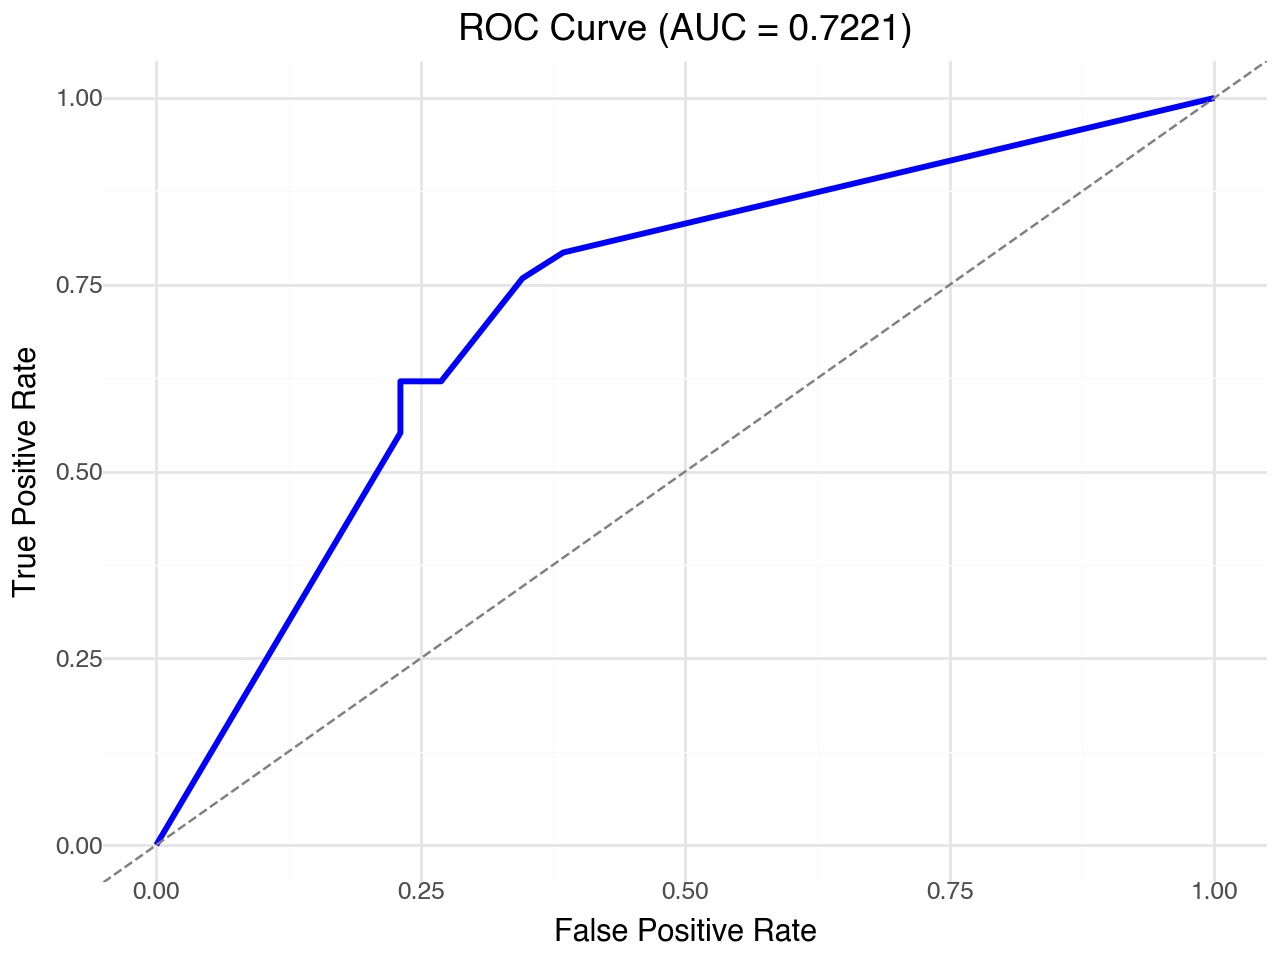

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


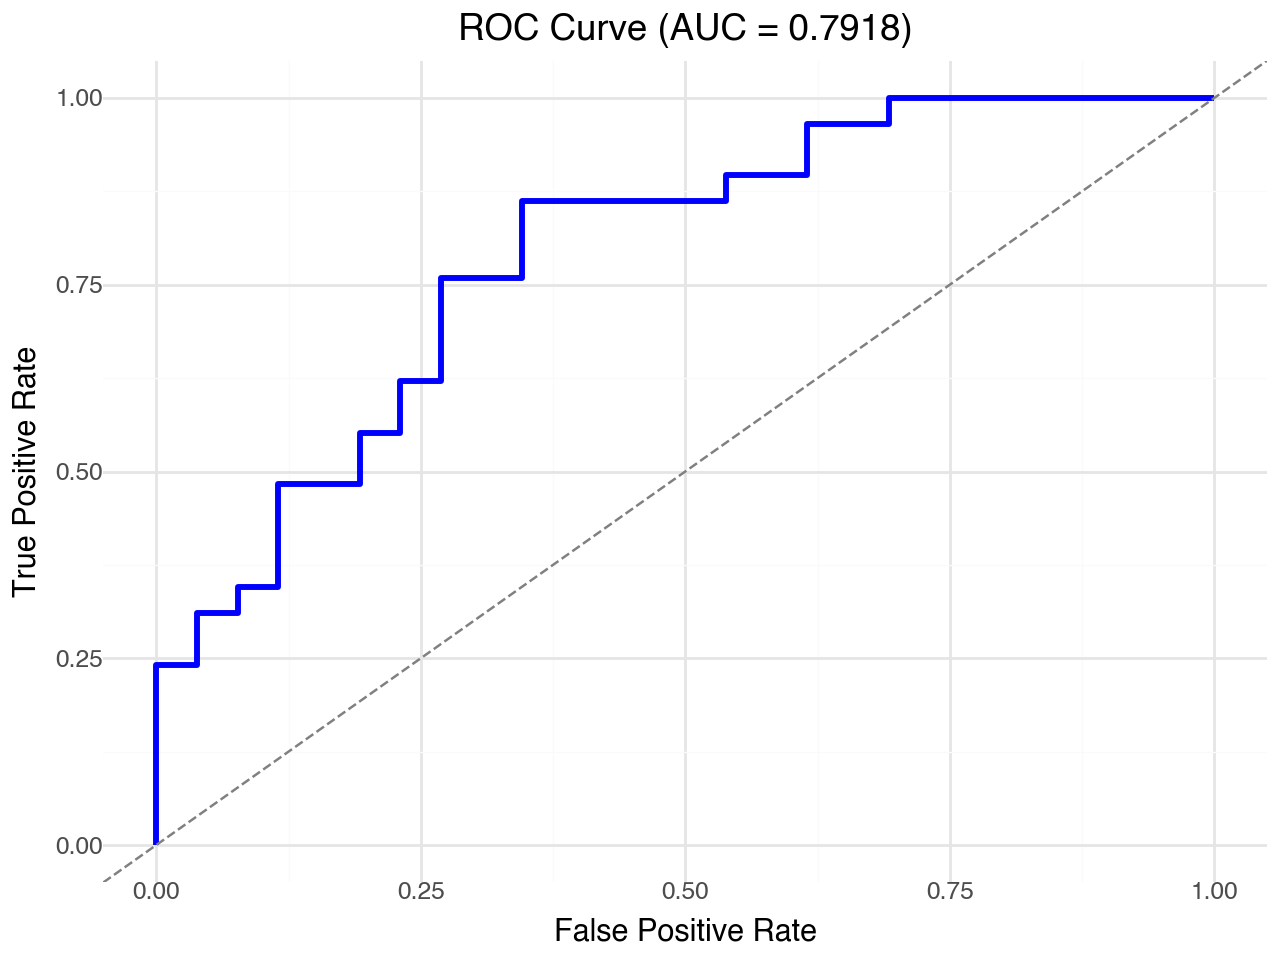

In [12]:
from sklearn.metrics import cohen_kappa_score

# Preprocessing
X = ha.drop(columns=['output'])
y = ha['output']

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test Splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection 
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Fit the final model
best_knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")

print(f"Test ROC AUC: {test_roc_auc:.4f}")


print("\n--- Cross-Validated Metrics ---")
y_pred_cross_val = cross_val_predict(best_knn, X_train, y_train, cv=5, method="predict")
y_pred_prob_cross_val = cross_val_predict(best_knn, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Cross-Validated Metrics
conf_matrix_cv = confusion_matrix(y_train, y_pred_cross_val)
roc_auc_cv = roc_auc_score(y_train, y_pred_prob_cross_val)
precision_cv = precision_score(y_train, y_pred_cross_val)
recall_cv = recall_score(y_train, y_pred_cross_val)
cohen_kappa_cv = cohen_kappa_score(y_train, y_pred_cross_val)
tn_cv, fp_cv, fn_cv, tp_cv = conf_matrix_cv.ravel()
specificity_cv = tn_cv / (tn_cv + fp_cv)


# Output Cross-Validated Metrics
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix_cv)
print(f"Cross-Validated ROC AUC: {roc_auc_cv:.4f}")
print(f"Cross-Validated Precision: {precision_cv:.4f}")
print(f"Cross-Validated Recall: {recall_cv:.4f}")
print(f"Cross validated Specificity: {specificity_cv:.4f}")
print(f"Cross validated Cohens Kappa: {specificity_cv:.4f}")
# Classification Report for Cross-Validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cross_val))


# Create a DataFrame for plotting
roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

# Plot the ROC Curve using plotnine
roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot)


#### Logistic Regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated ROC AUC: 0.8641
Test ROC AUC: 0.7918

--- Cross-Validated Metrics ---
Confusion Matrix (Cross-Validation):
[[ 62  39]
 [ 12 105]]
Cross-Validated ROC AUC: 0.8637
Cross-Validated Precision: 0.7292
Cross-Validated Recall: 0.8974
Cross validated Specificity: 0.6139
Cross validated Cohens Kappa: 0.6139
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       101
           1       0.73      0.90      0.80       117

    accuracy                           0.77       218
   macro avg       0.78      0.76      0.76       218
weighted avg       0.78      0.77      0.76       218

Cohen's Kappa: 0.4832
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated ROC AUC: 0.8641
T

<positron-console-cell-11>:79: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


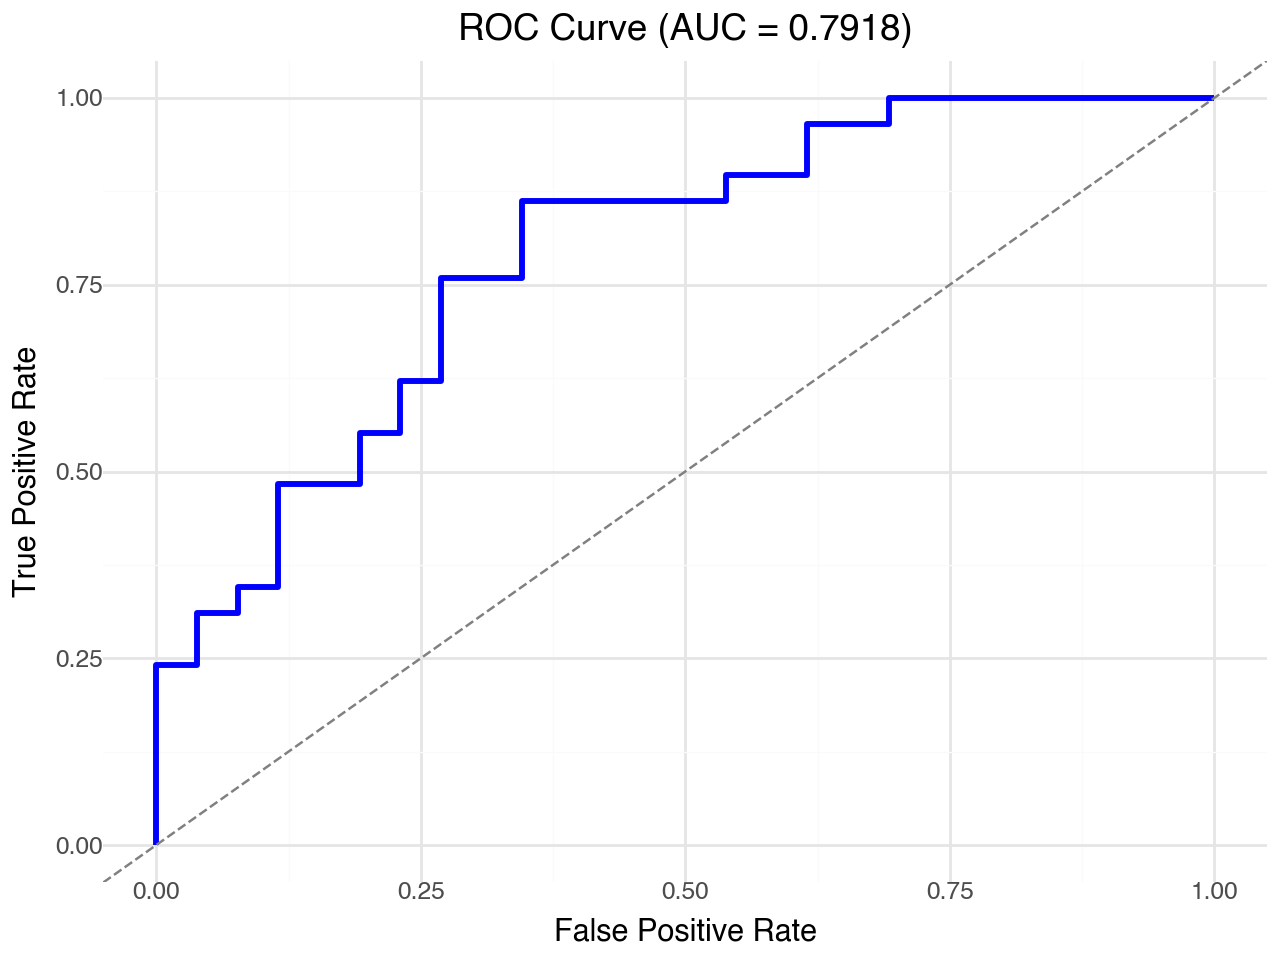

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


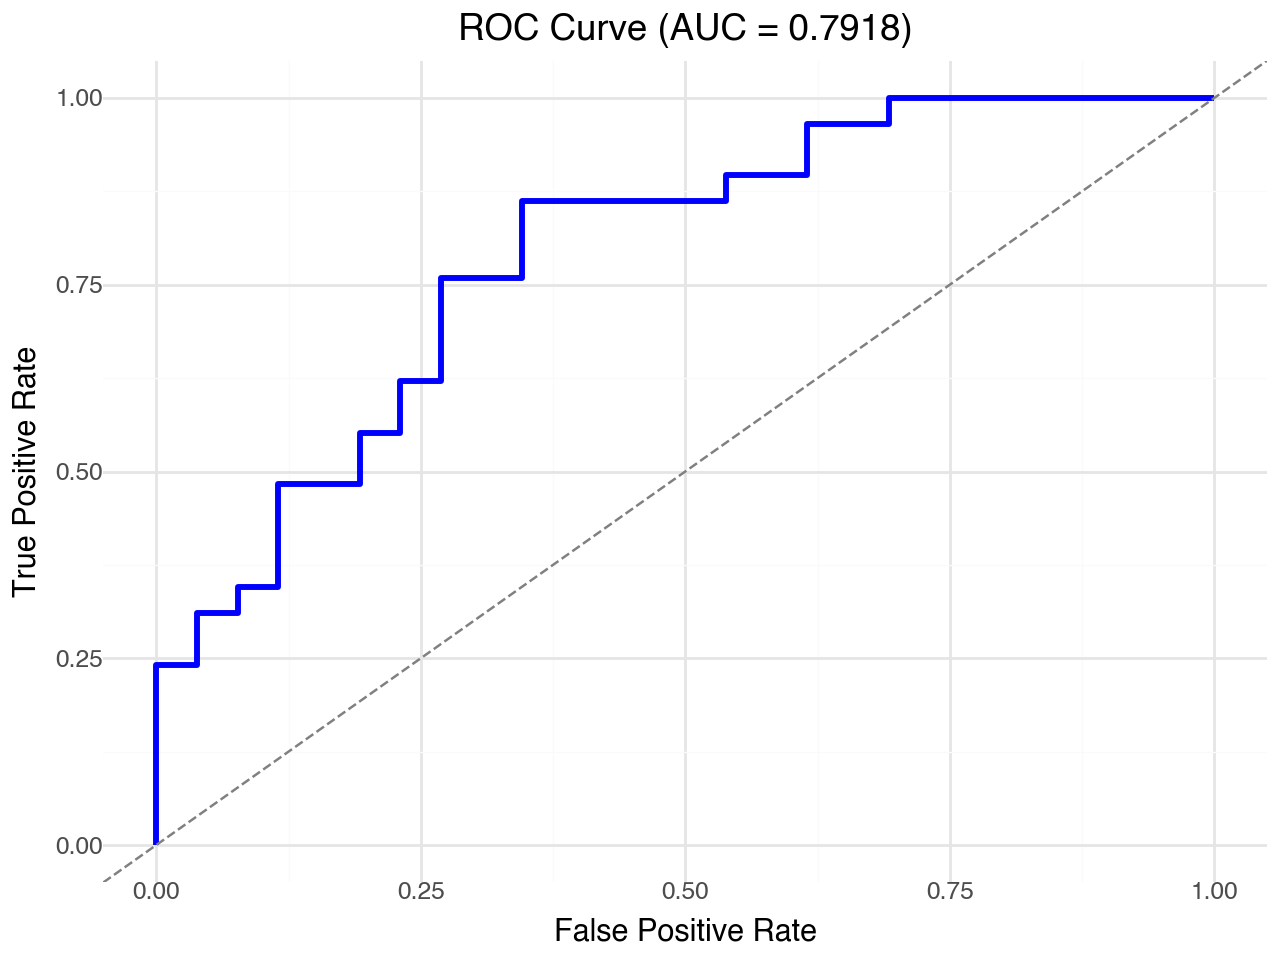

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


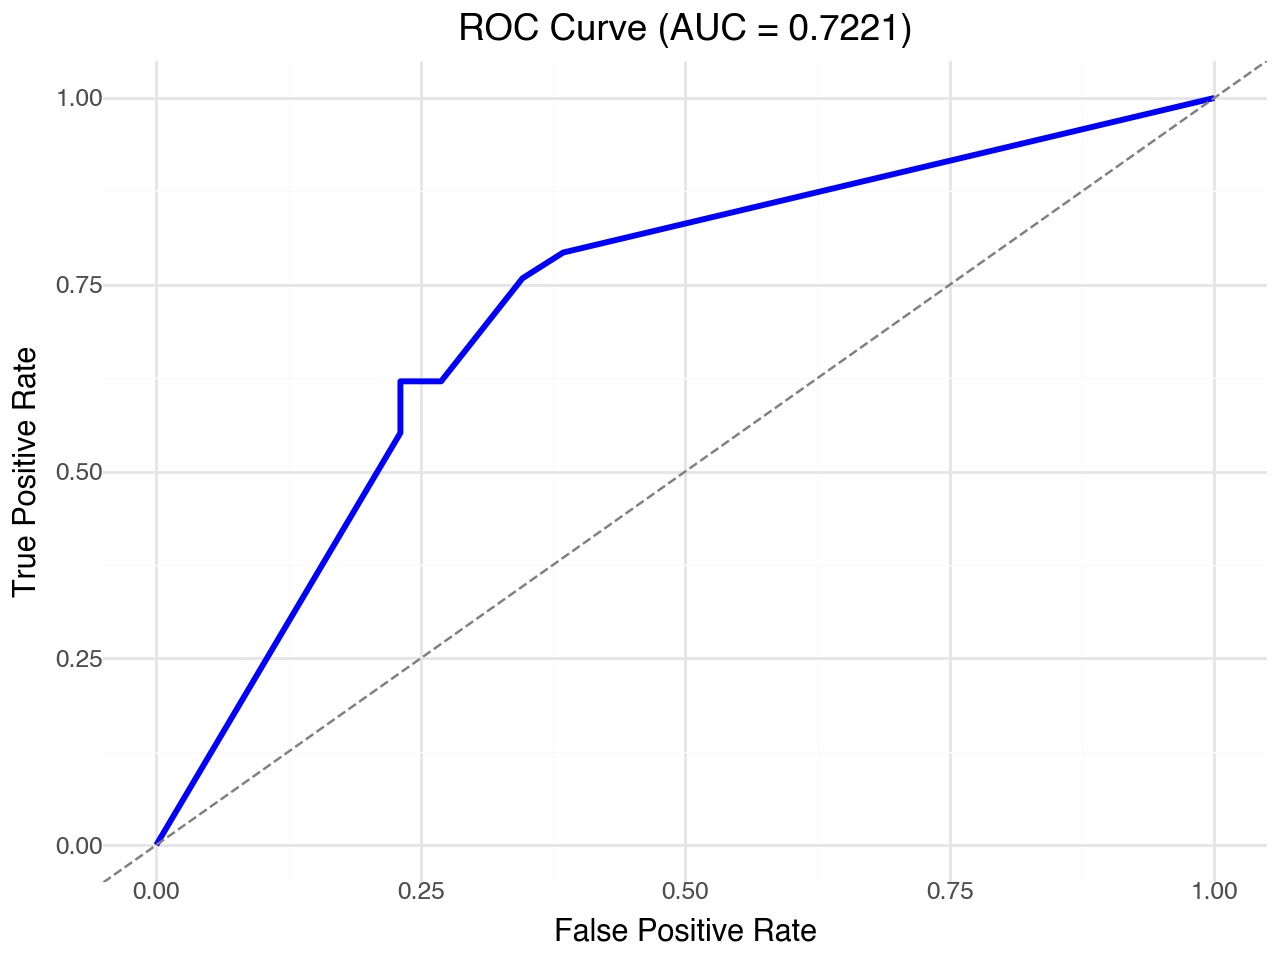

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


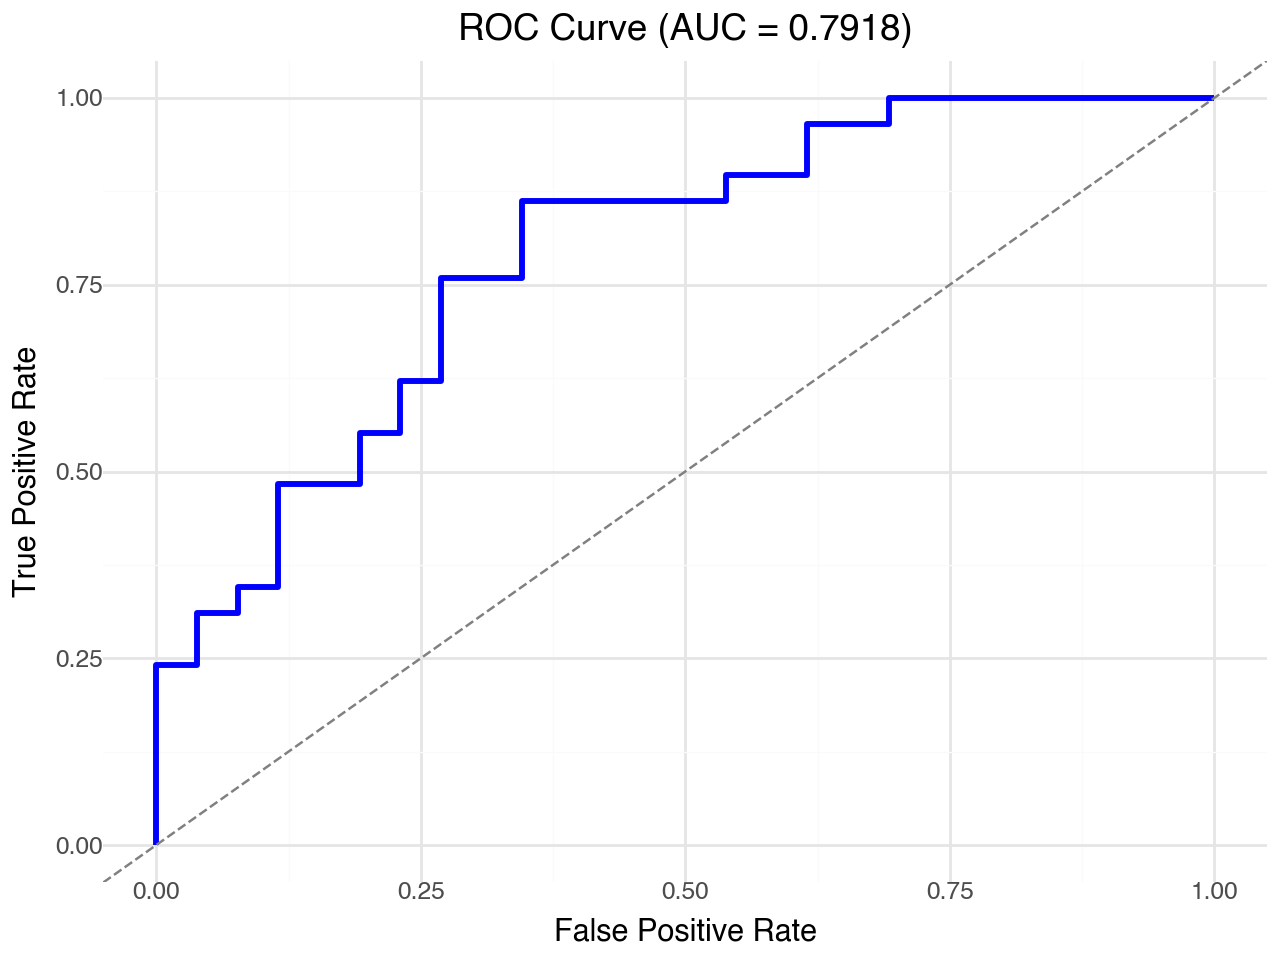

In [11]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Step 3: Fit the final model
best_logreg.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = best_logreg.predict(X_test)
y_pred_prob = best_logreg.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")

print("\n--- Cross-Validated Metrics ---")
y_pred_cross_val = cross_val_predict(best_logreg, X_train, y_train, cv=5, method="predict")
y_pred_prob_cross_val = cross_val_predict(best_logreg, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Cross-Validated Metrics
conf_matrix_cv = confusion_matrix(y_train, y_pred_cross_val)
roc_auc_cv = roc_auc_score(y_train, y_pred_prob_cross_val)
precision_cv = precision_score(y_train, y_pred_cross_val)
recall_cv = recall_score(y_train, y_pred_cross_val)
cohen_kappa_cv = cohen_kappa_score(y_train, y_pred_cross_val)
tn_cv, fp_cv, fn_cv, tp_cv = conf_matrix_cv.ravel()
specificity_cv = tn_cv / (tn_cv + fp_cv)


# Output Cross-Validated Metrics
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix_cv)
print(f"Cross-Validated ROC AUC: {roc_auc_cv:.4f}")
print(f"Cross-Validated Precision: {precision_cv:.4f}")
print(f"Cross-Validated Recall: {recall_cv:.4f}")
print(f"Cross validated Specificity: {specificity_cv:.4f}")
print(f"Cross validated Cohens Kappa: {specificity_cv:.4f}")
# Classification Report for Cross-Validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cross_val))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df2 = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

roc_plot2 = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot2)

#### Decision Tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated ROC AUC: 0.7966
Test ROC AUC: 0.7221

--- Cross-Validated Metrics ---
Confusion Matrix (Cross-Validation):
[[75 26]
 [23 94]]
Cross-Validated ROC AUC: 0.7944
Cross-Validated Precision: 0.7833
Cross-Validated Recall: 0.8034
Cross validated Specificity: 0.7426
Cross validated Cohens Kappa: 0.5471
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       101
           1       0.78      0.80      0.79       117

    accuracy                           0.78       218
   macro avg       0.77      0.77      0.77       218
weighted avg       0.77      0.78      0.77       218

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated ROC AUC: 0.7966
Test ROC AUC: 0.7221

--- Cross-Validated Metrics ---
Confusion Matrix (Cross-Validation):
[[75 26]
 [23 94

<positron-console-cell-13>:74: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


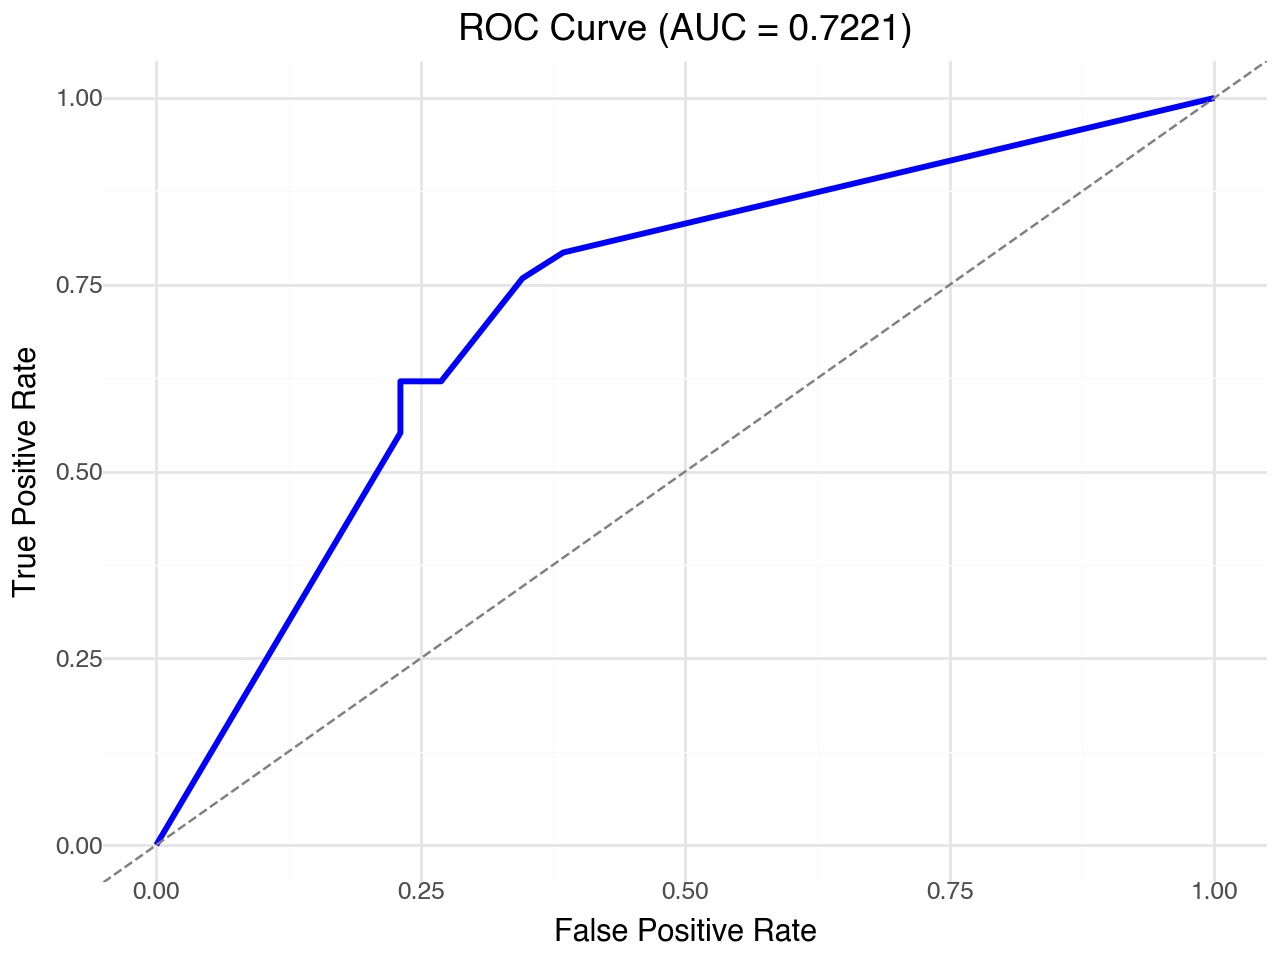

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


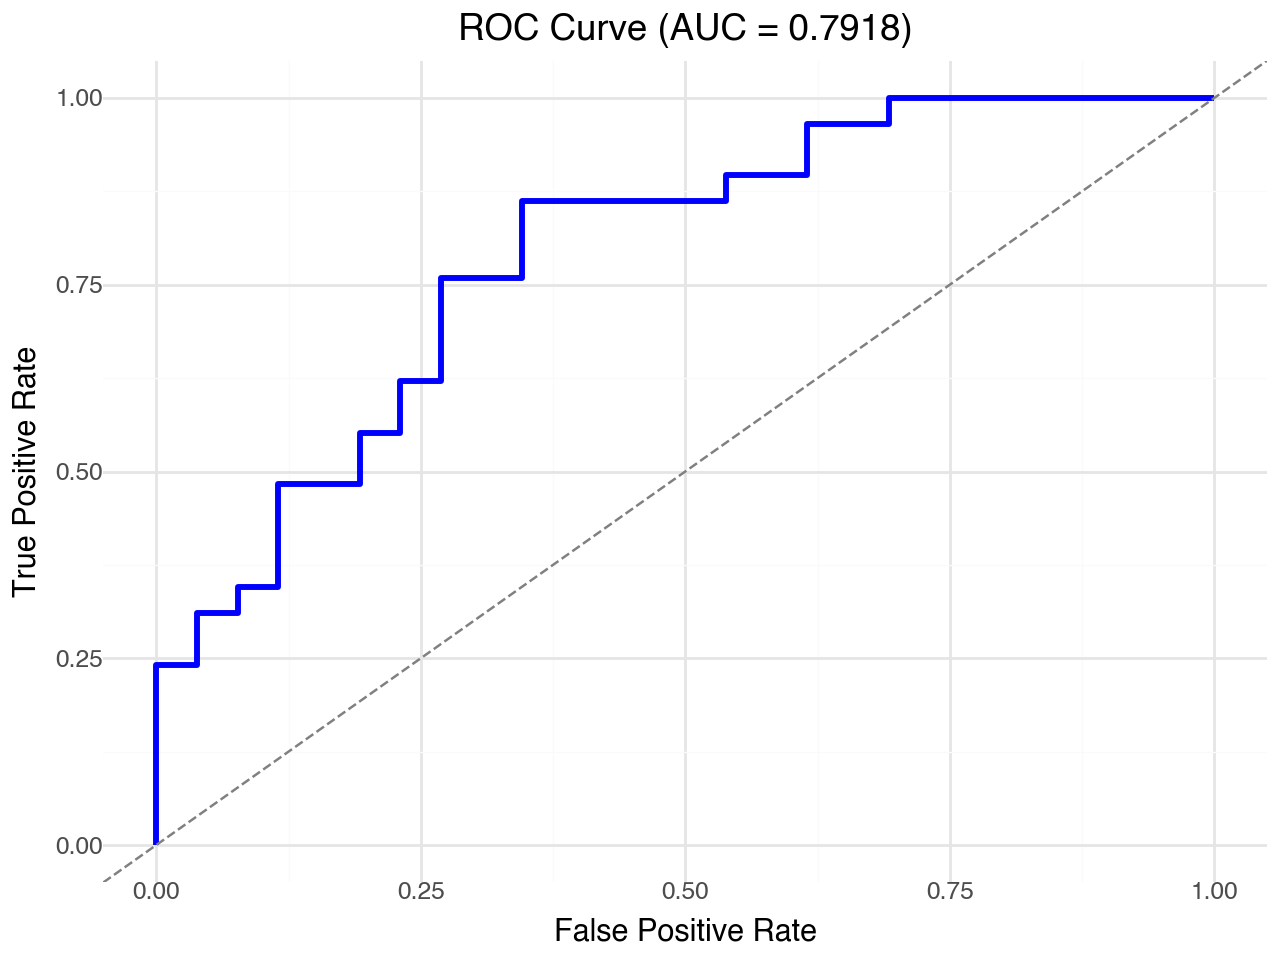

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


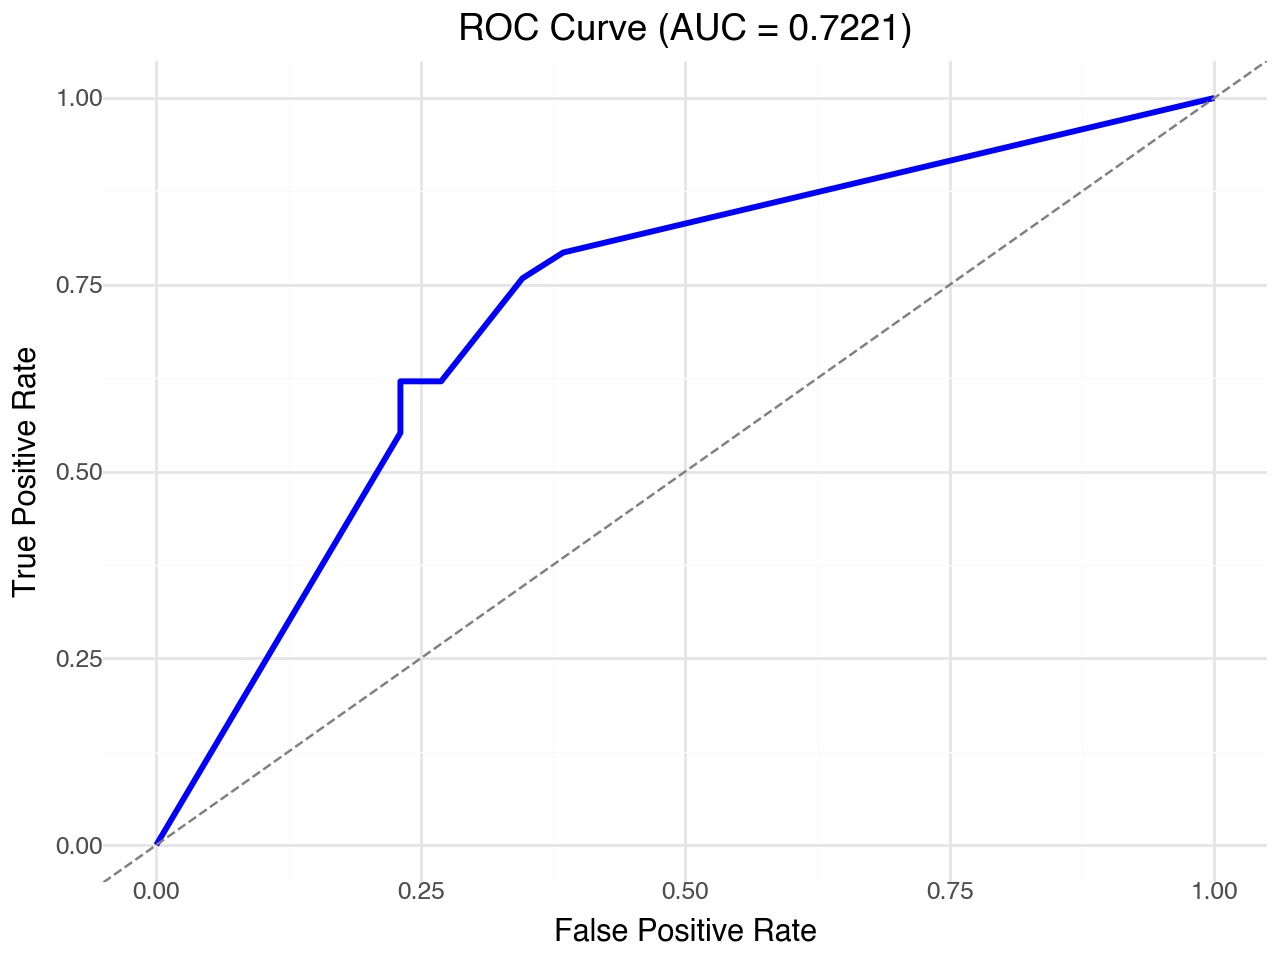

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


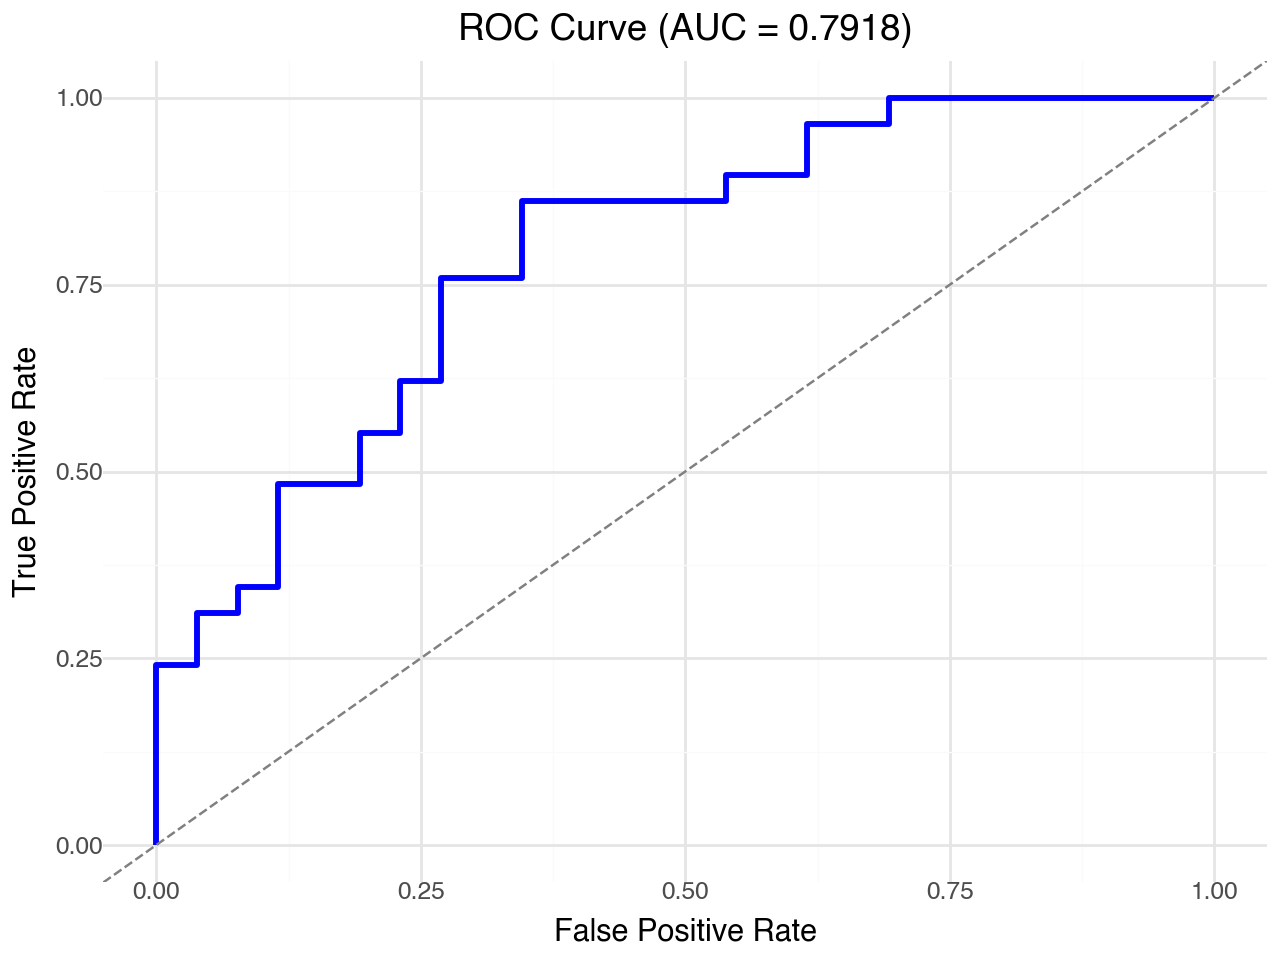

In [13]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Step 3: Fit the final model
best_tree.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = best_tree.predict(X_test)
y_pred_prob = best_tree.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")


print("\n--- Cross-Validated Metrics ---")
y_pred_cross_val = cross_val_predict(best_tree, X_train, y_train, cv=5, method="predict")
y_pred_prob_cross_val = cross_val_predict(best_tree, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Cross-Validated Metrics
conf_matrix_cv = confusion_matrix(y_train, y_pred_cross_val)
roc_auc_cv = roc_auc_score(y_train, y_pred_prob_cross_val)
precision_cv = precision_score(y_train, y_pred_cross_val)
recall_cv = recall_score(y_train, y_pred_cross_val)
cohen_kappa_cv = cohen_kappa_score(y_train, y_pred_cross_val)
tn_cv, fp_cv, fn_cv, tp_cv = conf_matrix_cv.ravel()
specificity_cv = tn_cv / (tn_cv + fp_cv)


# Output Cross-Validated Metrics
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix_cv)
print(f"Cross-Validated ROC AUC: {roc_auc_cv:.4f}")
print(f"Cross-Validated Precision: {precision_cv:.4f}")
print(f"Cross-Validated Recall: {recall_cv:.4f}")
print(f"Cross validated Specificity: {specificity_cv:.4f}")
print(f"Cross validated Cohens Kappa: {cohen_kappa_cv:.4f}")
# Classification Report for Cross-Validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cross_val))


# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df3 = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

roc_plot3 = (
    ggplot(roc_df3, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot3)

#### Q1
<P> When concerend about missing a diagnosis on a low risk patient we would focus on minimizing our false negative rate or the sensitiviity. This metric identifes our true positive cases and the model with the best sensitivity was logitsic regression at 0.89 <P>

#### Q2
<P> We are most concerned with ensuring that false positives occure at a low rate when optimizindg bed space. We can do this by focusing on the models percision and in this case the model with the beset percision is KNN with a percison of 0.798 <P>

#### Q3

<P> When looking ot investigate the leading predictors it is important to investigate the models with the most interperetable parameters. In this case, we are not as concerned about prediciton accuracy. These would be the decision tree or logistic regression as they have parameters that are easy to break down and interpret. LOGIT OR TREE <P>

#### Q4

<P> When compaing the training success of the new doctors genearl accuray would be a good metric to compare their success against. This or working ahead of this question Cohen's Kappa could compare a doctors agreement to that of the models. Either way the models best accuary and Cohens Kappa was KNN with accuracy of 0.79 and CK of 0.76 <P>

--- KNN ---
Confusion Matrix:
[[ 9  2]
 [ 7 12]]
ROC AUC: 0.9139
Precision: 0.8571
Recall: 0.6316
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.86      0.63      0.73        19

    accuracy                           0.70        30
   macro avg       0.71      0.72      0.70        30
weighted avg       0.75      0.70      0.71        30



--- Logistic Regression ---
Confusion Matrix:
[[ 9  2]
 [ 2 17]]
ROC AUC: 0.9234
Precision: 0.8947
Recall: 0.8947
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.89      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



--- Decision Tree ---
Confusion Matrix:
[[ 9  2]
 [ 9 10]]
ROC AUC: 0.6890
Precision

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


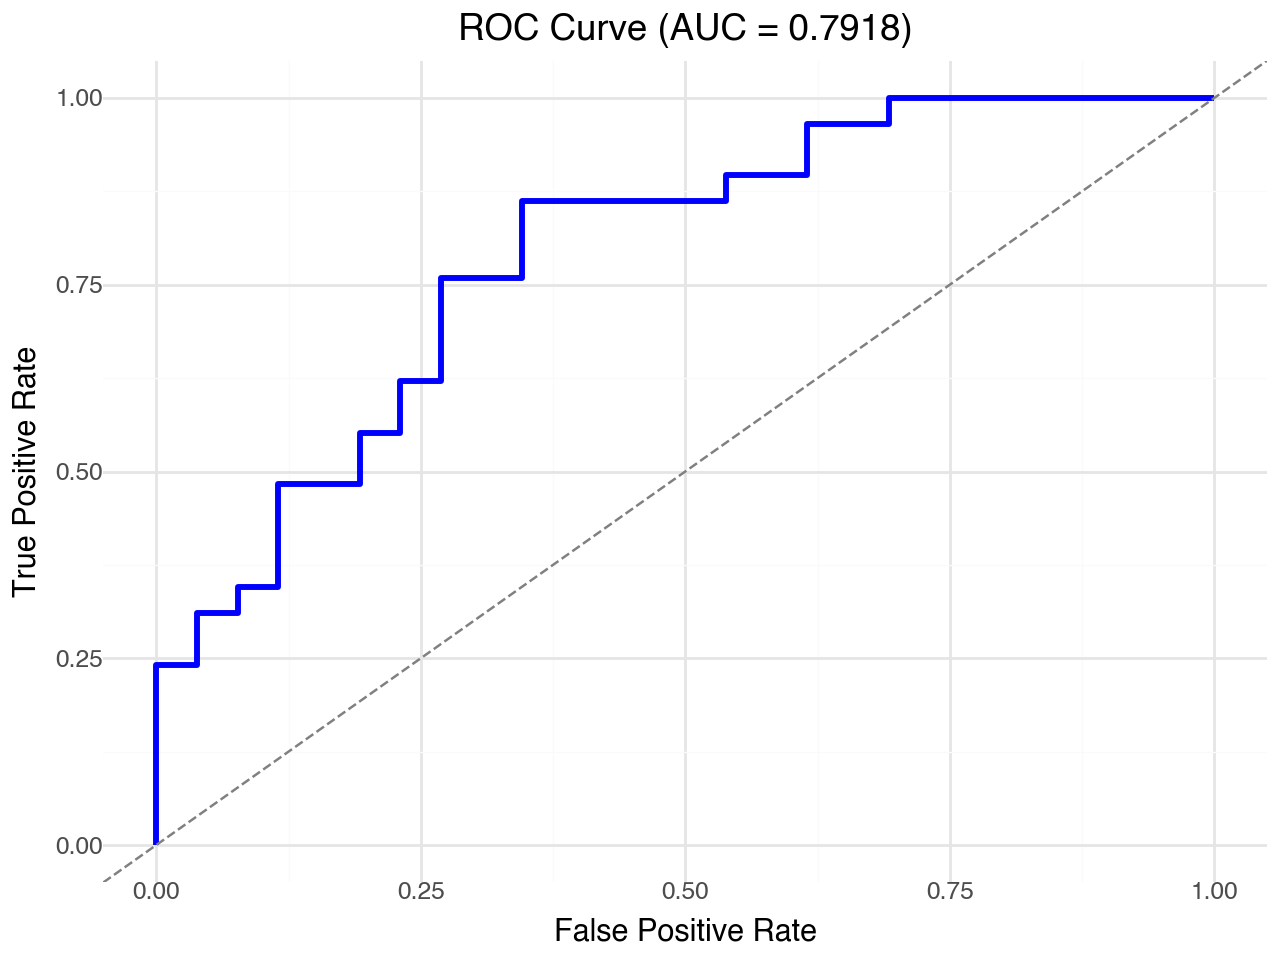

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


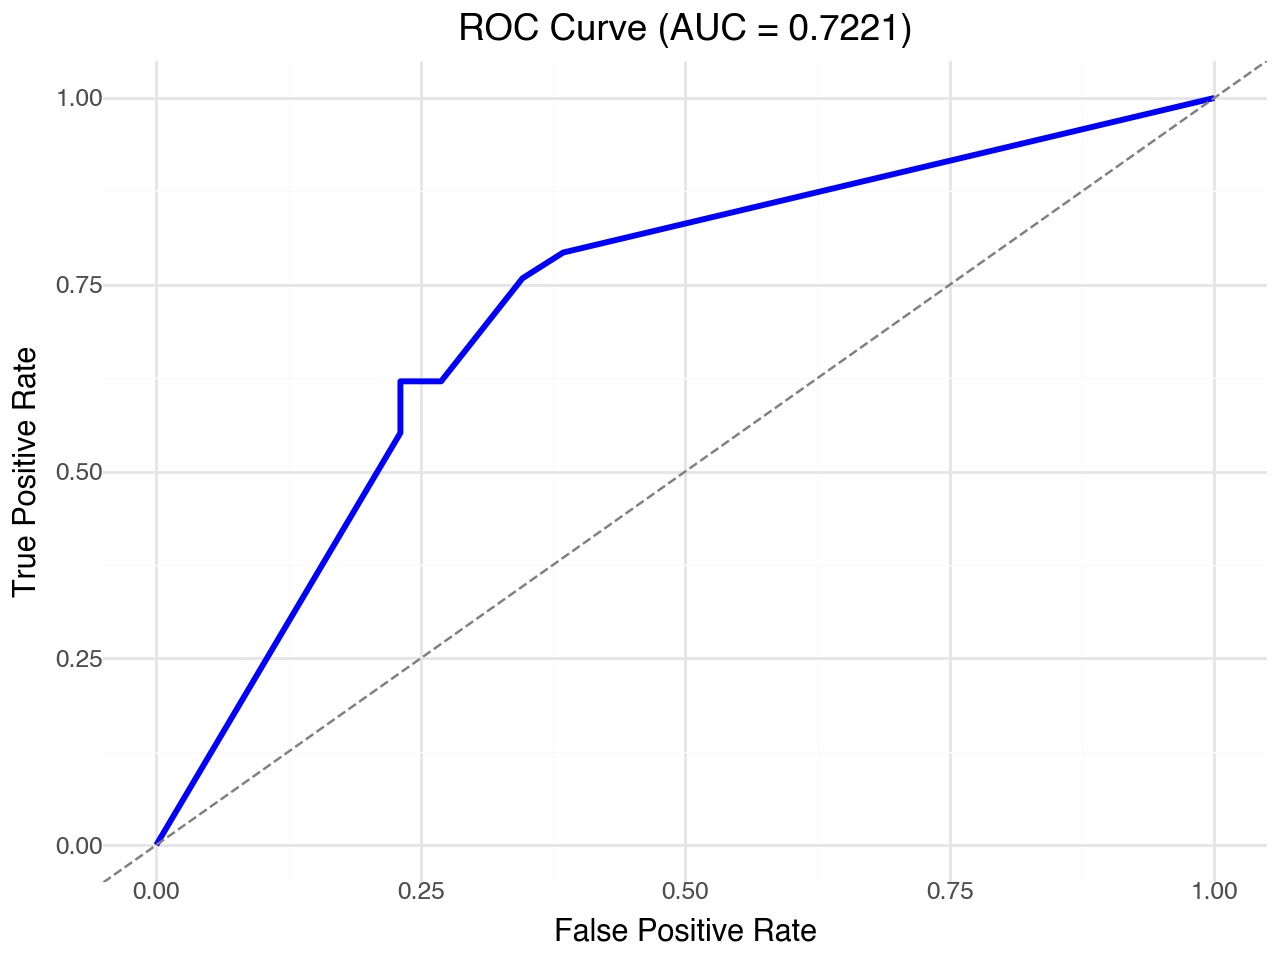

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


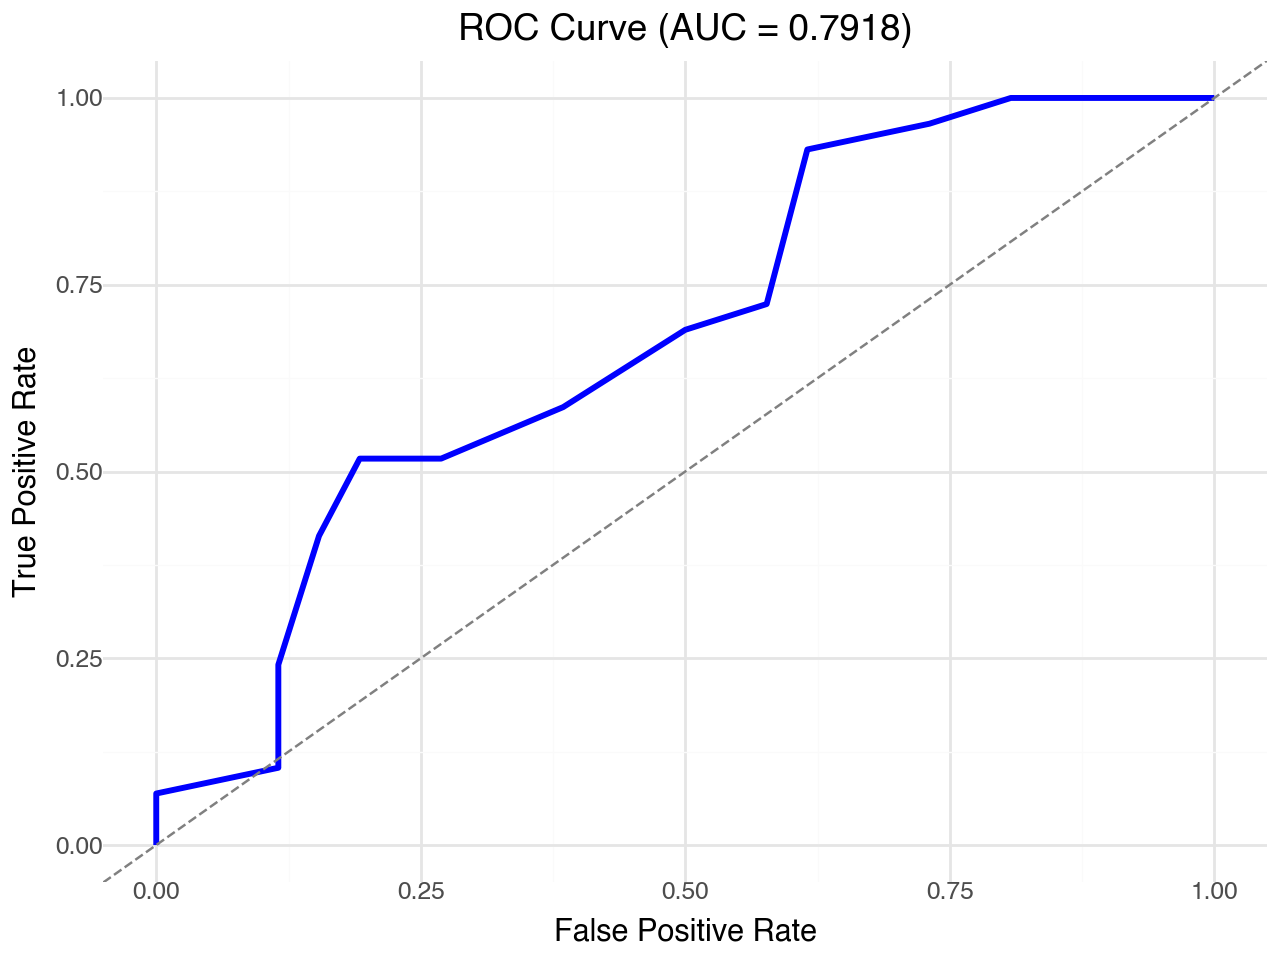

In [10]:
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")

X_val = ha_validation.drop(columns=['output'])  
y_val = ha_validation['output']

scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)

models = {
    "KNN": best_knn,
    "Logistic Regression": best_logreg,
    "Decision Tree": best_tree
}

# Iterate through the models and evaluate
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    
    # Predict class labels and probabilities
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    conf_matrix = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_prob)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("\n")

<p> Oddly enough, two of the models saw a cross validated ROC AUC value increase other than the decsion trees. None of the models saw a huge swing in the ROC AUC to warrent any concern, even the decision trees that had a slight decrease. <p>